### ENCABEZADO:

##### CREADORES: MARTIN ROSERO, JIMY CALVO
##### VERSION: 1.0
##### FECHA DE CREACION: 30/08/2022

### IMPORTACION E INSTALACION DE RECURSOS NECESARIOS

In [25]:
#INSTALACI0ON DE LIBRERIOAS

!pip install matplotlib
!pip install seaborn
!pip install modelo
!pip install pyMosaic
!pip install statsmodels

In [26]:
#IMPORTACION DE LIBRERIAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

### OBTENCION DE DATOS

In [27]:
#FUNCION PARA LEER ARCHIVO EXCEL

def leer_datos(ruta):
    df = pd.read_excel(ruta)   
    return df

In [28]:
#EXTRACCION DE DATOS E IMPRESION DE LA INFORMACION DE LOS MISMOS

df_Original = leer_datos("2020_SAT.xlsx")
print("---------------------------Informacion de la data---------------------------")
print("----------------------------------------------------------------------------")
print(df_Original.info())
print("---------------------------Encabezado de los data---------------------------")
print("----------------------------------------------------------------------------")
print(df_Original.head(3))

---------------------------Informacion de la data---------------------------
----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Unnamed: 0                              190 non-null    object
 1   Unnamed: 1                              255 non-null    object
 2   Human Development Index (HDI)           212 non-null    object
 3   Life expectancy at birth                212 non-null    object
 4   Expected years of schooling             212 non-null    object
 5   Mean years of schooling                 212 non-null    object
 6   Gross national income (GNI) per capita  212 non-null    object
 7   GNI per capita rank minus HDI rank      211 non-null    object
 8   HDI rank                                211 non-null    o

In [29]:
#CONTAVILIZAMOS LOS VALORES NULOS DEL DATAFRAME

df_Original.isna().sum().sort_values()

#Esto nos denota que existen dos columna sin identificar
#Ademas de que existe datos nulos constantes en todas las demas columnas 

Unnamed: 1                                11
Human Development Index (HDI)             54
Life expectancy at birth                  54
Expected years of schooling               54
Mean years of schooling                   54
Gross national income (GNI) per capita    54
GNI per capita rank minus HDI rank        55
HDI rank                                  55
Unnamed: 0                                76
dtype: int64

<AxesSubplot:>

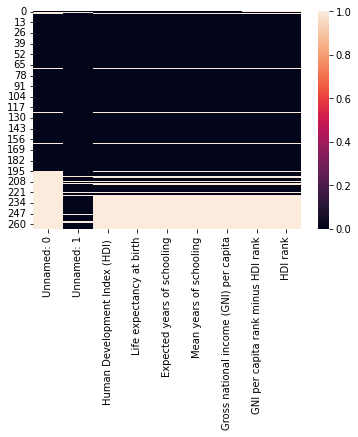

In [49]:
#REPRESENTACION GRAFICA DE DICHOS DATOS NULOS
sns.heatmap(df_Original.isna())

In [31]:
#IMPRIMIREMOS EL DATAFRAME PARA LOGRAR IDENTIFICAR LA UBICACION DE LOS DATOS NULOS

df_Original

#Podemos observar como los datos NaN se ubican especialmente en la ultima seccion del DATAFRAME 
#Se denota que existen ademas datos no correspondientes en varias columnas
#Recordaremos los años en los que se hicieron estos datos ya que es importante para su analisis

,Unnamed: 0,Unnamed: 1,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank
0,HDI rank,Country,Value,(years),(years),(years),(2017 PPP $),NaN,NaN
1,NaN,NaN,2019,2019,2019,2019,2019,2019,2018
2,NaN,VERY HIGH HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Norway,0.957,82.4,18.06615,12.89775,66494.25217,7,1
4,2,Ireland,0.955,82.31,18.70529,12.666331,68370.58737,4,3
...,...,...,...,...,...,...,...,...,...
261,NaN,Column 2: UNDESA (2019a).,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,NaN,Column 3: UNESCO Institute for Statistics (202...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,NaN,Column 4: UNESCO Institute for Statistics (202...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,NaN,"Column 5: World Bank (2020a), IMF (2020) and U...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#IMPRIMIMOS LOS PRIMEROS 50 DATOS PARA VERIFICAR LA INTEGRIDAD DE LOS MISMOS

df_Original.head(50)

#Existen algunas de las secciones de la tabla usadas como separadores,
#los cuales no nos sirven para el analisis objetivo de la data

,Unnamed: 0,Unnamed: 1,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank
0,HDI rank,Country,Value,(years),(years),(years),(2017 PPP $),NaN,NaN
1,NaN,NaN,2019,2019,2019,2019,2019,2019,2018
2,NaN,VERY HIGH HUMAN DEVELOPMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Norway,0.957,82.4,18.06615,12.89775,66494.25217,7,1
4,2,Ireland,0.955,82.31,18.70529,12.666331,68370.58737,4,3
5,2,Switzerland,0.955,83.78,16.32844,13.380812,69393.52076,3,2
6,4,"Hong Kong, China (SAR)",0.949,84.86,16.92947,12.27996,62984.76553,7,4
7,4,Iceland,0.949,82.99,19.08309,12.772787,54682.38057,14,4
8,6,Germany,0.947,81.33,16.97719,14.15168,55314.35355,11,4
9,7,Sweden,0.945,82.8,19.48234,12.54847,54507.80504,12,7


In [33]:
#IMPRIMIMOS LOS ULTIMOS 50 DATOS PARA VERIFICAR SI SON UTILES O NO LAS SECCIONES CON DATOS NULOS

df_Original.tail(50)

#Existe una gran cantidad de datos adicionales provenientes del archivo original que no sirve 

,Unnamed: 0,Unnamed: 1,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank
216,NaN,South Asia,0.641,69.948349,11.682315,6.537414,6531.552457,—,—
217,NaN,Sub-Saharan Africa,0.547,61.541158,10.05353,5.757771,3685.644365,—,—
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,NaN,Least developed countries,0.538,65.34563,9.891633,4.876943,2934.928762,—,—
220,NaN,Small island developing states,0.728,72.004603,12.309205,8.72368,16824.756145,—,—
221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,NaN,Organisation for Economic Co-operation and Dev...,0.9,80.352224,16.286046,11.976065,44967.023538,—,—
223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,NaN,World,0.737,72.752466,12.70643,8.532744,16733.82257,—,—
225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#CREACION DE UN DATAFRAME EXTRA PARA NO ALTERAR EL ORIGINAL, EL CUAL CONTIENE LOS DATOS YA FILTRANDO LOS 'NaN'
df = df_Original.dropna()
df.head(25)

,Unnamed: 0,Unnamed: 1,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank
3,1,Norway,0.957,82.4,18.06615,12.89775,66494.25217,7,1
4,2,Ireland,0.955,82.31,18.70529,12.666331,68370.58737,4,3
5,2,Switzerland,0.955,83.78,16.32844,13.380812,69393.52076,3,2
6,4,"Hong Kong, China (SAR)",0.949,84.86,16.92947,12.27996,62984.76553,7,4
7,4,Iceland,0.949,82.99,19.08309,12.772787,54682.38057,14,4
8,6,Germany,0.947,81.33,16.97719,14.15168,55314.35355,11,4
9,7,Sweden,0.945,82.8,19.48234,12.54847,54507.80504,12,7
10,8,Australia,0.944,83.44,21.95433,12.724691,48084.84207,15,7
11,8,Netherlands,0.944,82.28,18.48513,12.4148,57707.06867,6,9
12,10,Denmark,0.94,80.9,18.89342,12.613803,58661.87084,2,10


In [35]:
#COMPROBAMOS LA INTEGRIDAD DE LA DATA EN SUS ULTIMAS SECCIONES
df = df_Original.dropna()
df.tail(25)

,Unnamed: 0,Unnamed: 1,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank
170,165,Lesotho,0.527,54.33,11.31561,6.539283,3150.620131,-6,165
171,166,Djibouti,0.524,67.11,6.791215,4.1,5689.348966,-34,166
172,167,Togo,0.515,61.04,12.66498,4.949926,1602.34934,12,168
173,168,Senegal,0.512,67.94,8.58486,3.183085,3309.385734,-11,167
174,169,Afghanistan,0.511,64.83,10.17643,3.93,2229.362021,0,169
175,170,Haiti,0.51,64,9.7,5.59237,1708.809043,7,170
176,170,Sudan,0.51,65.31,7.884416,3.77,3828.660219,-18,171
177,172,Gambia,0.496,62.05,9.911519,3.922,2167.883472,-1,172
178,173,Ethiopia,0.485,66.6,8.813018,2.883189,2206.534378,-3,174
179,174,Malawi,0.483,64.26,11.24191,4.73,1034.677638,13,174


In [36]:
#COMPROBAMOS QUE YA NO EXISTEN VALORES NaN EN EL DATAFRAME

df.isna().sum().sort_values()

Unnamed: 0                                0
Unnamed: 1                                0
Human Development Index (HDI)             0
Life expectancy at birth                  0
Expected years of schooling               0
Mean years of schooling                   0
Gross national income (GNI) per capita    0
GNI per capita rank minus HDI rank        0
HDI rank                                  0
dtype: int64

### LIMPIEZA DE DATOS

<AxesSubplot:>

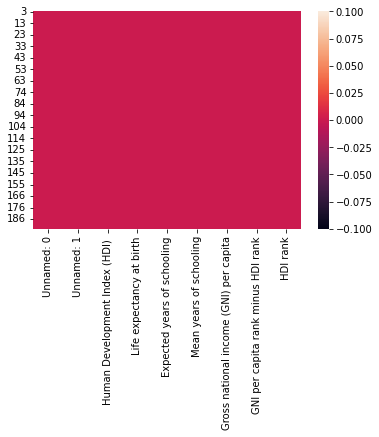

In [37]:
#VERIFICAMOS LOS DATOS COMPLETADOS

print()
sns.heatmap(df.isna())

#Aun podemos ver que existen 2 columnas sin nombre del cual una es de los nombres de los
#paises y otra que representa al ranking de los paises segun vemos inferimos de los datos

In [38]:
#COLOCAREMOS LOS NOMBRES A LAS COLUMNAS QUE NO LO TIENEN Y LE AGREGAMOS EL AÑO (DEL DATAFRAME ORIGINAL) A LAS COLUMNAS NECESARIAS

df = df.rename(columns={'Unnamed: 0':'RANK (2019)','Unnamed: 1':'CONTRY','HDI rank':'HDI rank (2018)'})

In [39]:
#VERIFICAMOS EL CAMBIO
df

,RANK (2019),CONTRY,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank (2018)
3,1,Norway,0.957,82.4,18.06615,12.89775,66494.25217,7,1
4,2,Ireland,0.955,82.31,18.70529,12.666331,68370.58737,4,3
5,2,Switzerland,0.955,83.78,16.32844,13.380812,69393.52076,3,2
6,4,"Hong Kong, China (SAR)",0.949,84.86,16.92947,12.27996,62984.76553,7,4
7,4,Iceland,0.949,82.99,19.08309,12.772787,54682.38057,14,4
...,...,...,...,...,...,...,...,...,...
190,185,Burundi,0.433,61.58,11.06933,3.287983,753.908748,4,184
191,185,South Sudan,0.433,57.85,5.296258,4.8,2003.318894,-10,186
192,187,Chad,0.398,54.24,7.34935,2.52368,1555.373575,-5,187
193,188,Central African Republic,0.397,53.28,7.56836,4.282,993.008842,0,188


In [40]:
#REAPRACION DEL INDEX YA QUE FALTAN LOS QUE SE ELIMINARON
df.reset_index(drop=True, inplace=True)

In [41]:
#COMPROBAMOS QUE EL CAMBIO EN SU INDEX SE EFECTUO
df

,RANK (2019),CONTRY,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank (2018)
0,1,Norway,0.957,82.4,18.06615,12.89775,66494.25217,7,1
1,2,Ireland,0.955,82.31,18.70529,12.666331,68370.58737,4,3
2,2,Switzerland,0.955,83.78,16.32844,13.380812,69393.52076,3,2
3,4,"Hong Kong, China (SAR)",0.949,84.86,16.92947,12.27996,62984.76553,7,4
4,4,Iceland,0.949,82.99,19.08309,12.772787,54682.38057,14,4
...,...,...,...,...,...,...,...,...,...
184,185,Burundi,0.433,61.58,11.06933,3.287983,753.908748,4,184
185,185,South Sudan,0.433,57.85,5.296258,4.8,2003.318894,-10,186
186,187,Chad,0.398,54.24,7.34935,2.52368,1555.373575,-5,187
187,188,Central African Republic,0.397,53.28,7.56836,4.282,993.008842,0,188


In [42]:
#APARTIR DEL DATAFRAME YA COMPLETO CREAMOS OTROS PARA EL ANALISIS DEL IDH EN LOS 10 RANKIS SUPERIORES E INFERIORES en el 2019 y 2018

df_Superior = df.head(10).drop(['Human Development Index (HDI) ', 'Life expectancy at birth',	'Expected years of schooling',	'Mean years of schooling',	'Gross national income (GNI) per capita',	'GNI per capita rank minus HDI rank'], axis=1)
df_Superior = df_Superior.set_index('CONTRY')
df_Superior 

df_Inferior = df.tail(10).drop(['Human Development Index (HDI) ', 'Life expectancy at birth',	'Expected years of schooling',	'Mean years of schooling',	'Gross national income (GNI) per capita',	'GNI per capita rank minus HDI rank'], axis=1)
df_Inferior = df_Inferior.set_index('CONTRY')
df_Inferior 


,RANK (2019),HDI rank (2018)
CONTRY,,
Eritrea,180,180
Mozambique,181,181
Burkina Faso,182,183
Sierra Leone,182,182
Mali,184,184
Burundi,185,184
South Sudan,185,186
Chad,187,187
Central African Republic,188,188


### VISUALIZACION DE DATOS

(<Figure size 432x288 with 3 Axes>,
 {('1', '1'): (0.0, 0.0, 0.0970873786407767, 0.9803921568627451),
  ('1', '3'): (0.0, 0.9836601307189543, 0.0970873786407767, 0.0),
  ('1', '2'): (0.0, 0.9869281045751633, 0.0970873786407767, 0.0),
  ('1', '4'): (0.0, 0.9901960784313726, 0.0970873786407767, 0.0),
  ('1', '7'): (0.0, 0.9934640522875817, 0.0970873786407767, 0.0),
  ('1', '9'): (0.0, 0.9967320261437908, 0.0970873786407767, 0.0),
  ('1', '10'): (0.0, 1.0, 0.0970873786407767, 0.0),
  ('2', '1'): (0.10194174757281554, 0.0, 0.19417475728155337, 0.0),
  ('2', '3'): (0.10194174757281554,
   0.0032679738562091504,
   0.19417475728155337,
   0.49019607843137253),
  ('2', '2'): (0.10194174757281554,
   0.49673202614379086,
   0.19417475728155337,
   0.49019607843137253),
  ('2', '4'): (0.10194174757281554,
   0.9901960784313726,
   0.19417475728155337,
   0.0),
  ('2', '7'): (0.10194174757281554,
   0.9934640522875817,
   0.19417475728155337,
   0.0),
  ('2', '9'): (0.10194174757281554,
   0.996

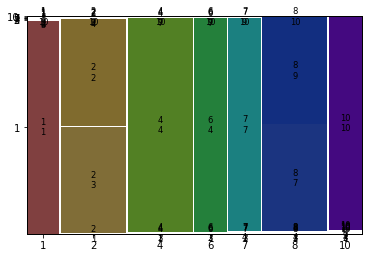

In [44]:
#USAREMOS UN GRAFICO DE MOSAICO PARA REALIZAR LA COMPARACION DEL RANKIN DE LOS 10 PRIEMROS PAISES EN 2019 Y 2018
mosaic(df_Superior, ['RANK (2019)', 'HDI rank (2018)'])


<AxesSubplot:ylabel='CONTRY'>

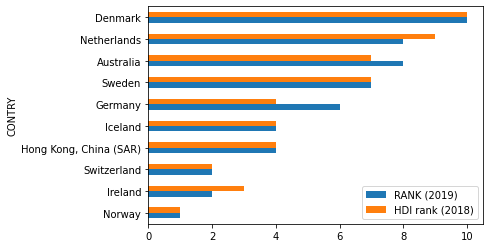

In [45]:
#CON LA AYUDA DE UNA GRAFICO DOBLE BARRA HORIZONTAL DENOTAREMOS LA VARIACION DEL RANKING DE LOS 10 PRIMEROS PAISES

df_Superior.plot(kind = 'barh')

<AxesSubplot:ylabel='CONTRY'>

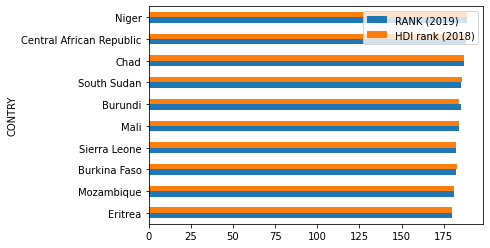

In [50]:
#CON LA AYUDA DE UNA GRAFICO DOBLE BARRA HORIZONTAL DENOTAREMOS LA VARIACION DEL RANKING DE LOS 10 PRIMEROS PAISES

df_Inferior.plot(kind = 'barh')

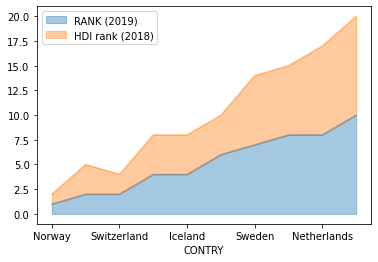

In [46]:
df_Superior.plot.area(alpha=0.4);

In [47]:
df_Inferior

,RANK (2019),HDI rank (2018)
CONTRY,,
Eritrea,180,180
Mozambique,181,181
Burkina Faso,182,183
Sierra Leone,182,182
Mali,184,184
Burundi,185,184
South Sudan,185,186
Chad,187,187
Central African Republic,188,188


In [48]:
df_Superior

,RANK (2019),HDI rank (2018)
CONTRY,,
Norway,1,1
Ireland,2,3
Switzerland,2,2
"Hong Kong, China (SAR)",4,4
Iceland,4,4
Germany,6,4
Sweden,7,7
Australia,8,7
Netherlands,8,9
